In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing two datasets
frog_data1 = pd.read_excel('all_frog_data.xlsx')
frog_data1.head()

C:\Users\Vault\AppData\Local\Temp/ipykernel_2040/1479429817.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  frog_data1 = pd.read_excel('all_frog_data.xlsx')


,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax


In [3]:
frog_data2 = pd.read_excel('All_MLOut_new.xlsx')
frog_data2.head()

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668


In [9]:
#checking the number of rows and columns of frog_data1
frog_data1.shape


(193791, 9)

In [10]:
#checking the number of rows and columns of frog_data2
frog_data2.shape

(193791, 13)

Since frog_data1 and frog_data2 have a number of same column names and values in their dataset as shown above
traingulation of any of the dataset is neccessary to avoid duplication of some columns and its values.


In [11]:
#calling up frogdata_data2 columns and removing common columns
frog_data2.columns

Index(['Unnamed: 0', 'gbifID', 'country', 'continent', 'decimalLatitude',
       'decimalLongitude', 'species', 'occurrenceStatus', 'key', 'ppt_mean',
       'soil_mean', 'tmax_mean', 'tmin_mean'],
      dtype='object')

In [14]:
new_frog2 = frog_data2[['gbifID', 'occurrenceStatus', 'key', 'ppt_mean','soil_mean', 'tmax_mean', 'tmin_mean']]
new_frog2

,gbifID,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...
193786,1322002619,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,0,193789,190.06667,141.43333,29.326668,23.588335


In [16]:
#merging frog_data1 to new_frog2
final_frog = frog_data1.merge(new_frog2, on = 'gbifID', how = 'inner')
final_frog

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [18]:
#checking null values in the data set
final_frog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        193791 non-null  int64         
 1   gbifID            193791 non-null  int64         
 2   eventDate         185026 non-null  datetime64[ns]
 3   country           193791 non-null  object        
 4   continent         193791 non-null  object        
 5   stateProvince     193099 non-null  object        
 6   decimalLatitude   193791 non-null  float64       
 7   decimalLongitude  193791 non-null  float64       
 8   species           193791 non-null  object        
 9   occurrenceStatus  193791 non-null  int64         
 10  key               193791 non-null  int64         
 11  ppt_mean          161812 non-null  float64       
 12  soil_mean         161812 non-null  float64       
 13  tmax_mean         161812 non-null  float64       
 14  tmin

It is observed evendate, stateProvince, ppt_mean, soil_mean, tmax_mean, tmin_mean have null values in them as their count 
is not up to  193791

In [21]:
final_frog[['ppt_mean','soil_mean', 'tmax_mean', 'tmin_mean']].describe()

,ppt_mean,soil_mean,tmax_mean,tmin_mean
count,161812.000000,161812.000000,161812.000000,161812.000000
mean,68.193053,55.523826,22.698504,11.160806
std,31.459189,49.908966,3.474586,3.455892
min,0.766667,0.000000,10.465001,0.758334
25%,49.183334,21.400000,20.305002,8.675002
50%,64.600000,47.416668,22.778334,11.245001
75%,77.900000,69.066666,24.218334,12.721667
max,368.750000,403.716670,37.401672,25.253334


### soil_mean

<function matplotlib.pyplot.show(close=None, block=None)>

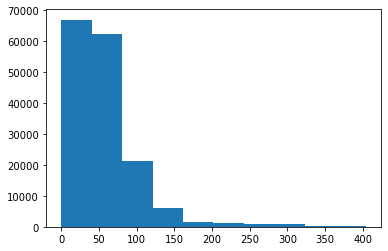

In [23]:
plt.hist(final_frog['soil_mean'])
plt.show

the 50th percentile is 47.4. means 50% of frogs or less are living in an habitat with a very low soil temperature. 

additionally, 75th percentile is 69.06. thus 75% of frogs are having an habitat with a low soil temperature. 25% of frogs are living in a habitat with higher soil moisture 

### tmax_mean

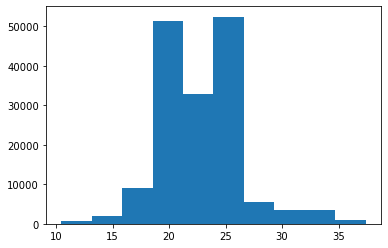

In [28]:
plt.hist(final_frog['tmax_mean'])
plt.show()

the figure shows a normal distribution with a mean of 22.69 and a 50th percentile of 22.77. from the flow of the distribution it can be said that the tmax temperatures across the habitats are normal

50% of frogs are a living in habitat with a relatively high temperature values. with the other 50% or more having an habitat with a relatively low temperature values. 

75% of frogs are in habitats with high tmax temperatures and 25% are in habitat with very high temperatures between 24.2 to 37.4

### tmin_mean

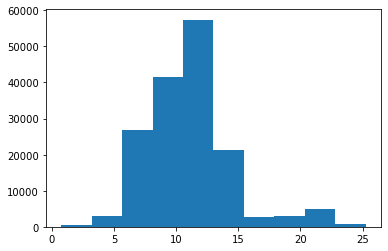

In [31]:
plt.hist(final_frog['tmin_mean'])
plt.show()

50 percentile is 11.24. 50 percent of the minimum temperature mean of frogs habitats are low. thus from the the flow of distruibution on the left,relatively half or less habitats have low min_temp mean

also 50% and more of habitats have relative high min temperatures.at 75% percentile, 75% of forgs have habitats with high min_temperatures and 25% having higher values gearing from 12.7 to 25.25



It therefore can be said that, from the tmax_mean and tmin_mean, habibtats having low temperatures have also have high temperatures and vice versa.